In [107]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn.metrics as mean_squared_error
import sklearn.metrics as r2_score
import statsmodels.api as sm
from sklearn.model_selection import train_test_split

PHẦN 1: TÌM HIỂU DỮ LIỆU VÀ LÀM SẠCH LÝ DỮ LIỆU (2 ĐIỂM _ CLO 1)

In [108]:
#1.	Trộn 3bảng dữ liệu với nhau vào 1 dataframe.
df1=pd.read_csv('quiz_1_grades.csv')
df2=pd.read_csv('quiz_2_grades.csv')
df3=pd.read_csv('quiz_3_grades.csv')


# Trộn các bảng lại với nhau
combined_df = pd.concat([df1, df2, df3], ignore_index=True)


# Kiểm tra kết quả
print(combined_df.head())


  Last Name First Name                     Email  Grade
0   Bennett    Richard  richard.bennett@univ.edu     10
1    Parker    Timothy   timothy.parker@univ.edu      9
2     Reyes      Carol      carol.reyes@univ.edu      5
3    Powers     Brooke    brooke.powers@univ.edu      6
4    Taylor    Michael   michael.taylor@univ.edu      5


In [109]:
#Doc file vaf hien thi toan bo du lieu 
combined_df
# co 450 dong vaf 4 cot

,Last Name,First Name,Email,Grade
0,Bennett,Richard,richard.bennett@univ.edu,10
1,Parker,Timothy,timothy.parker@univ.edu,9
2,Reyes,Carol,carol.reyes@univ.edu,5
3,Powers,Brooke,brooke.powers@univ.edu,6
4,Taylor,Michael,michael.taylor@univ.edu,5
...,...,...,...,...
445,Adams,Amy,amy.adams@univ.edu,12
446,Roberts,Steven,steven.roberts@univ.edu,8
447,Barrera,Woody,woody.barrera_jr@univ.edu,11
448,Taylor,Michael,michael.taylor@univ.edu,13


In [110]:
combined_df.shape # co 450 dong va 4 cot 
combined_df.info()
combined_df.dtypes

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 450 entries, 0 to 449
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Last Name   450 non-null    object
 1   First Name  450 non-null    object
 2   Email       450 non-null    object
 3   Grade       450 non-null    int64 
dtypes: int64(1), object(3)
memory usage: 14.2+ KB


Last Name     object
First Name    object
Email         object
Grade          int64
dtype: object

      LastName : Kiểu dữ liệu chuỗi , biến định tính
      FistName: Kiểu dữ liệu chuỗi , biến định tính
      Email: Kiểu dữ liệu chuỗi , biến định tính
      Grade: Kiểu dữ liệu số nguyên , biến định lương 

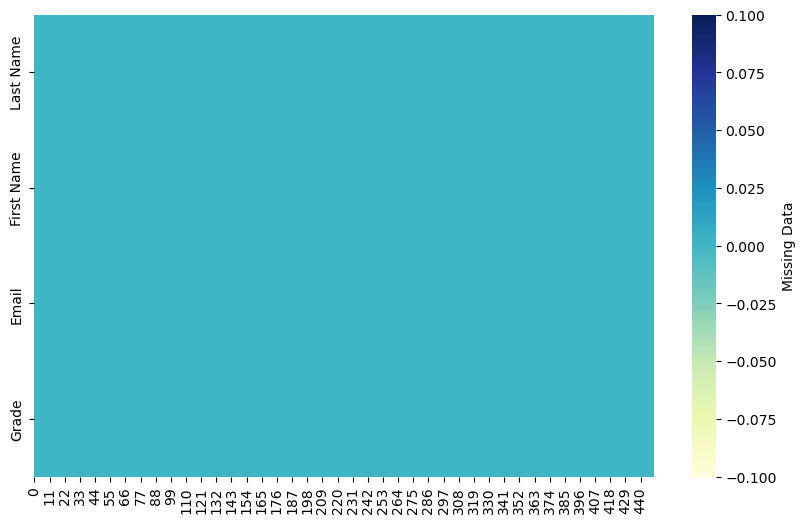

In [111]:
#3 dung bieu do hetmap
plt.figure(figsize=(10,6))
sns.heatmap(combined_df.isna().transpose(), cmap="YlGnBu", cbar_kws={'label': 'Missing Data'})
plt.savefig("anh_MISS_DATAING.png",dpi=100)
plt.show()
# XEM QUA BIEU DO THI KHONG CO DU LIEU NAO BI RONG 

In [112]:
# Kiểm tra dữ liệu thiếu trong từng cột
missing_values = combined_df.isnull().sum()

# Hiển thị số lượng giá trị thiếu trong mỗi cột
print(missing_values)

Last Name     0
First Name    0
Email         0
Grade         0
dtype: int64


In [113]:
combined_df.columns

Index(['Last Name', 'First Name', 'Email', 'Grade'], dtype='object')

In [114]:
# Thêm cột Grade mới với giá trị ngẫu nhiên trong khoảng từ 4 đến 17
np.random.seed(42)  # Đặt seed để kết quả có thể tái lập
combined_df['New Grade'] = np.random.randint(4, 18, size=len(combined_df))
# Kiểm tra DataFrame sau khi thêm cột mới
combined_df


,Last Name,First Name,Email,Grade,New Grade
0,Bennett,Richard,richard.bennett@univ.edu,10,10
1,Parker,Timothy,timothy.parker@univ.edu,9,7
2,Reyes,Carol,carol.reyes@univ.edu,5,16
3,Powers,Brooke,brooke.powers@univ.edu,6,14
4,Taylor,Michael,michael.taylor@univ.edu,5,11
...,...,...,...,...,...
445,Adams,Amy,amy.adams@univ.edu,12,9
446,Roberts,Steven,steven.roberts@univ.edu,8,13
447,Barrera,Woody,woody.barrera_jr@univ.edu,11,6
448,Taylor,Michael,michael.taylor@univ.edu,13,11


In [115]:
#3.	Sửa dữ liệu của 1 cột nào đó theo điều kiện nào đó. Hiển thị dữ liệu của cột này
combined_df.loc[combined_df['Email']=='richard.bennett@univ.edu'].head()

,Last Name,First Name,Email,Grade,New Grade
0,Bennett,Richard,richard.bennett@univ.edu,10,10
185,Bennett,Richard,richard.bennett@univ.edu,6,10
330,Bennett,Richard,richard.bennett@univ.edu,9,15


In [116]:
combined_df.loc[combined_df['Email']=='richard.bennett@univ.edu','Email']='abc@gamil.com'

In [117]:
# xem lai du lieu cot da sua 
combined_df.loc[0:330,['Email']] # cot Email vi tri 0 va 330 da doi thanh abc@gamil.com

,Email
0,abc@gamil.com
1,timothy.parker@univ.edu
2,carol.reyes@univ.edu
3,brooke.powers@univ.edu
4,michael.taylor@univ.edu
...,...
326,courtney.wolf@univ.edu
327,jonathan.pena@univ.edu
328,timothy.edwards@univ.edu
329,michael.benton@univ.edu


In [118]:
#4.	Lưu trữ dữ liệu đã xử lý thành công với tên file TenFileCu_clean.csv 
combined_df.to_csv('quiz_1_2_3_grades_clean.csv')

In [119]:
df=pd.read_csv('quiz_1_2_3_grades_clean.csv')
df

,Unnamed: 0,Last Name,First Name,Email,Grade,New Grade
0,0,Bennett,Richard,abc@gamil.com,10,10
1,1,Parker,Timothy,timothy.parker@univ.edu,9,7
2,2,Reyes,Carol,carol.reyes@univ.edu,5,16
3,3,Powers,Brooke,brooke.powers@univ.edu,6,14
4,4,Taylor,Michael,michael.taylor@univ.edu,5,11
...,...,...,...,...,...,...
445,445,Adams,Amy,amy.adams@univ.edu,12,9
446,446,Roberts,Steven,steven.roberts@univ.edu,8,13
447,447,Barrera,Woody,woody.barrera_jr@univ.edu,11,6
448,448,Taylor,Michael,michael.taylor@univ.edu,13,11


PHẦN 2: XỬ LÝ DỮ LIỆU – TRỰC QUAN HOÁ DỮ LIỆU (3 ĐIỂM_CLO2)

C:\Users\My PC\AppData\Local\Temp\ipykernel_8496\1262226688.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='Last Name', y='Grade', data=combined_df, estimator='mean',ci=None)


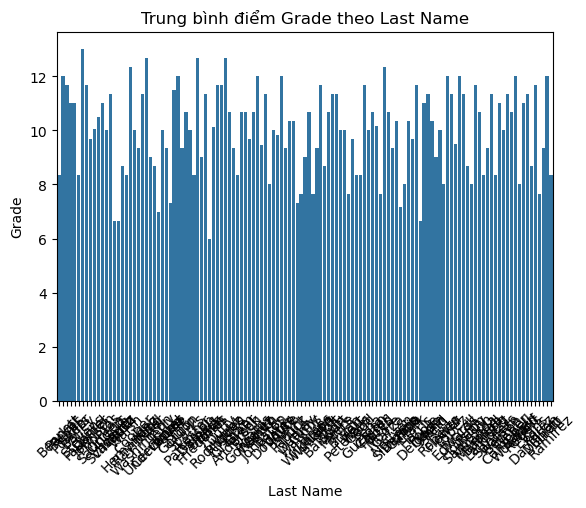

In [120]:
#2 Tạo barplot: Trung bình điểm 'Grade' theo 'Last Name'
sns.barplot(x='Last Name', y='Grade', data=combined_df, estimator='mean',ci=None)

# Thiết lập tiêu đề và xoay nhãn trục X cho dễ đọc
plt.title('Trung bình điểm Grade theo Last Name')
plt.xticks(rotation=45)
plt.show()

C:\Users\My PC\AppData\Local\Temp\ipykernel_8496\4249048132.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=mean_total_by_LastName, x='Last Name', y='Grade', palette='viridis')


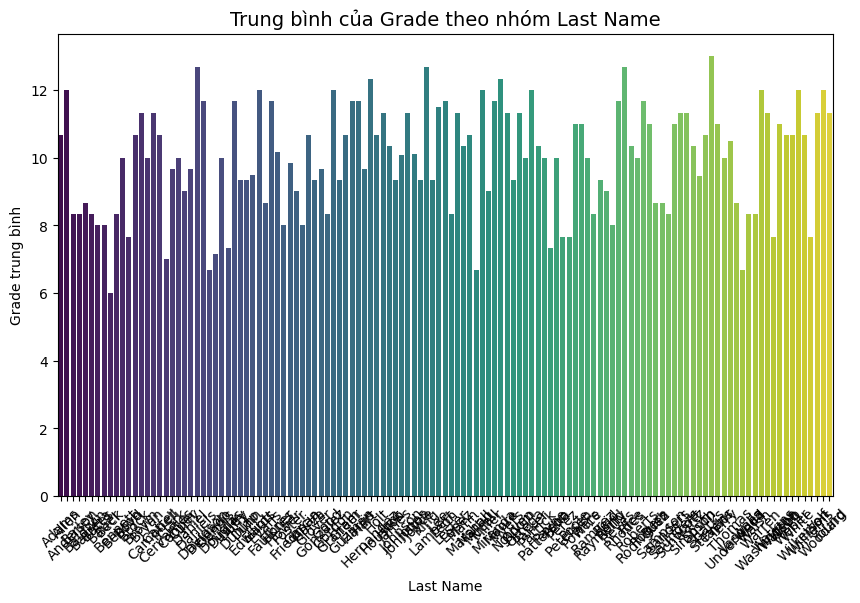

In [121]:
# Tính trung bình của 'Grade' theo 'Last Name'
mean_total_by_LastName = combined_df.groupby('Last Name')['Grade'].mean().reset_index()

# Vẽ biểu đồ barplot
plt.figure(figsize=(10,6))
sns.barplot(data=mean_total_by_LastName, x='Last Name', y='Grade', palette='viridis')

# Đặt tiêu đề và nhãn cho biểu đồ
plt.title('Trung bình của Grade theo nhóm Last Name', fontsize=14)
plt.xlabel('Last Name')
plt.ylabel('Grade trung bình')
plt.xticks(rotation=45)
plt.show()


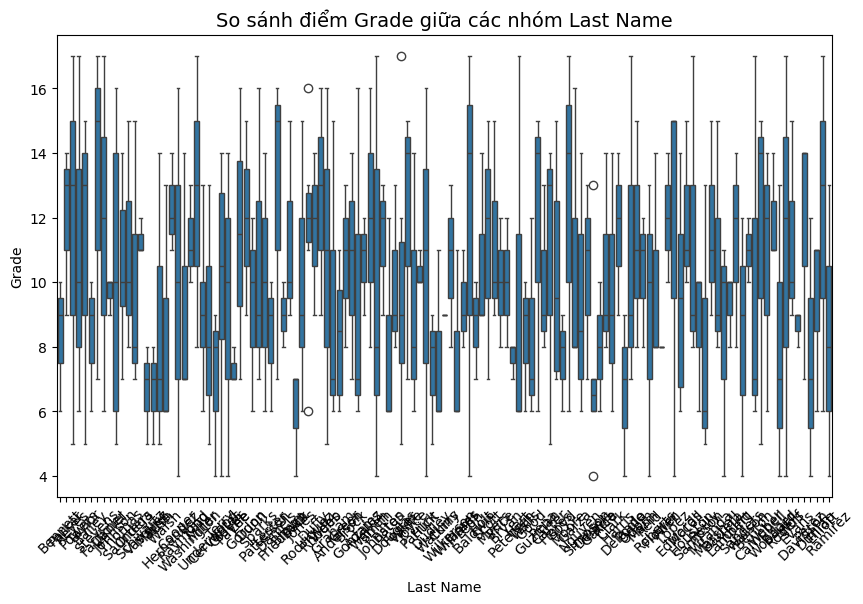

In [122]:
#3.	Vẽ biểu đồ so sánh của 1 thuộc tính giữa các nhóm định lượng


# Vẽ boxplot để so sánh điểm 'Grade' giữa các nhóm 'Last Name'
plt.figure(figsize=(10, 6))
sns.boxplot(x='Last Name', y='Grade', data=combined_df)

# Đặt tiêu đề và nhãn cho biểu đồ
plt.title('So sánh điểm Grade giữa các nhóm Last Name', fontsize=14)
plt.xlabel('Last Name')
plt.ylabel('Grade')
plt.xticks(rotation=45)
plt.show()


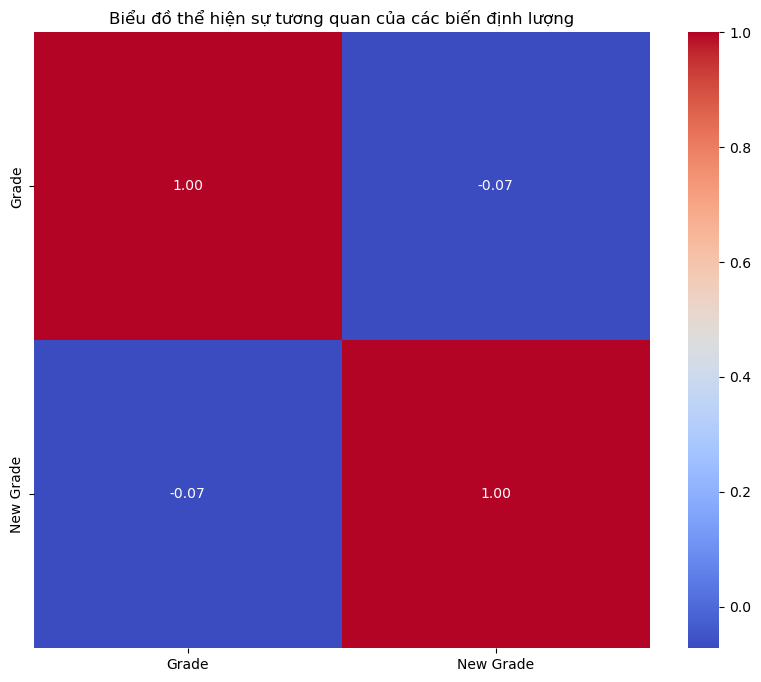

In [123]:
#4.	Vẽ biểu đồ thể hiện sự tương quan của các biến định lượng
# # Chọn các cột có kiểu dữ liệu số
numeric_df = combined_df.select_dtypes(include=['number']) 
# Tính toán ma trận tương quan
correlation_matrix = numeric_df.corr()

# Vẽ biểu đồ heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", square=True)
plt.title('Biểu đồ thể hiện sự tương quan của các biến định lượng')
plt.savefig("anh_tuongquan",dpi=100)

plt.show()

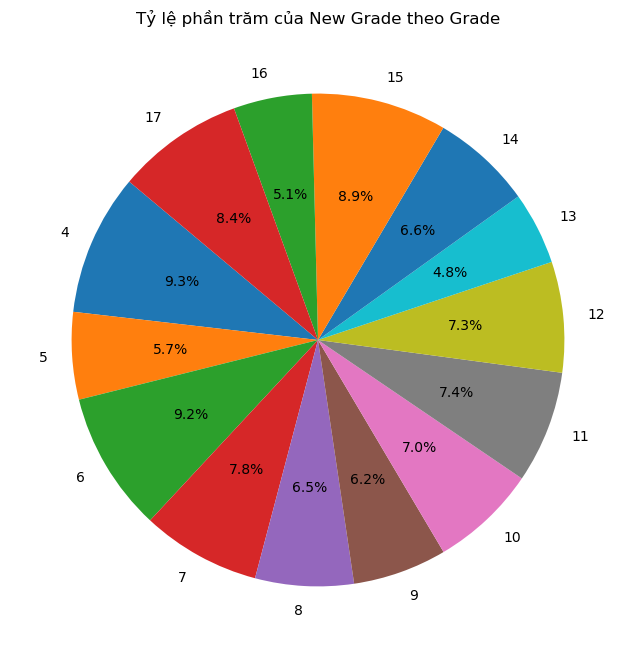

In [130]:
#5.	Vẽ biểu đồ tròn thể hiện tỉ lệ phần trăm của 1 biến định lượng theo 1 nhóm nào đó.
import pandas as pd
import matplotlib.pyplot as plt

Firstname_byGrade = df.groupby('New Grade')['Grade'].sum()

# Vẽ biểu đồ tròn
plt.figure(figsize=(8, 8))
plt.pie(Firstname_byGrade, labels=Firstname_byGrade.index, autopct='%1.1f%%', startangle=140)
plt.savefig("anh_bieudotron.png",dpi=100)

# Thêm tiêu đề
plt.title('Tỷ lệ phần trăm của New Grade theo Grade')

# Hiển thị biểu đồ
plt.show()




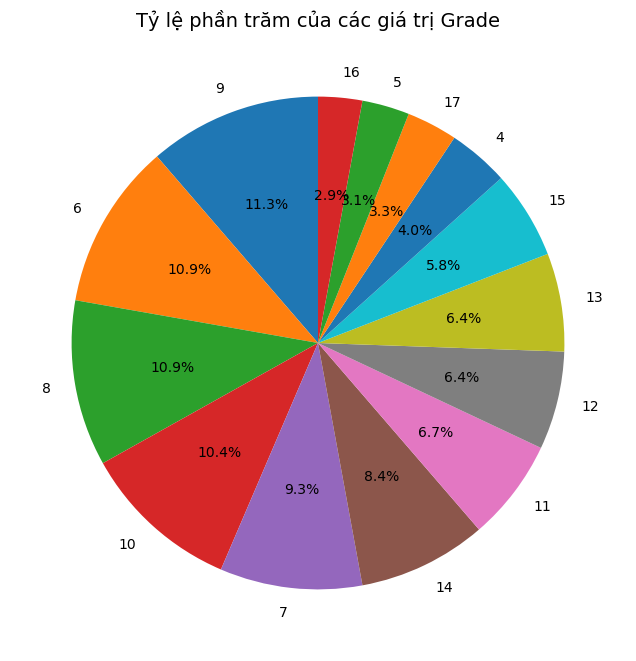

In [125]:
import pandas as pd
import matplotlib.pyplot as plt

# Tính tần suất xuất hiện của mỗi giá trị trong cột Grade
grade_counts = combined_df['Grade'].value_counts()

# Vẽ biểu đồ tròn
plt.figure(figsize=(8, 8))
plt.pie(grade_counts, labels=grade_counts.index, autopct='%1.1f%%', startangle=90)

# Đặt tiêu đề
plt.title('Tỷ lệ phần trăm của các giá trị Grade', fontsize=14)
plt.show()


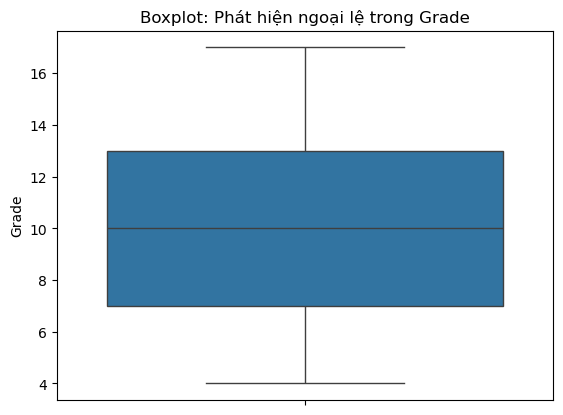

In [126]:
#6Dùng biểu đồ boxlot để tìm giá trị ngoại lệ cho 1 thuộc tính nào đó. Tìm độ trải giữa (IQR) của cột dữ liệu bị ngoại lệ. Loại bỏ dữ liệu ngoại lệ. 
import seaborn as sns
import matplotlib.pyplot as plt

# Vẽ boxplot cho cột SALES
sns.boxplot(y=df['Grade'])

# Thêm tiêu đề
plt.title('Boxplot: Phát hiện ngoại lệ trong Grade')

# Hiển thị biểu đồ
plt.show()


In [127]:
# Tính Q1 (phần tư thứ nhất) và Q3 (phần tư thứ ba)
Q1 = combined_df['Grade'].quantile(0.25)
Q3 =combined_df['Grade'].quantile(0.75)
print("Q1:",Q1)
print("Q3:",Q3)

# Tính IQR (Interquartile Range - Độ trải giữa)
IQR = Q3 - Q1
print(f'IQR của Grade: {IQR}')

# Xác định giới hạn dưới và trên để phát hiện ngoại lệ
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

print('lower_bound:',lower_bound)
print('upper_bound:',upper_bound)
# Lọc ra các ngoại lệ
outliers = combined_df[(combined_df['Grade'] < lower_bound) | (combined_df['Grade'] > upper_bound)]
print('Ngoại lệ trong Grade:')
print(outliers)

# Loại bỏ các ngoại lệ khỏi DataFrame
df_clean = combined_df[(combined_df['Grade'] >= lower_bound) & (combined_df['Grade'] <= upper_bound)]
# Kiểm tra số dòng trước khi lọc
print(f'Số dòng trước khi lọc ngoại lệ: {combined_df.shape[0]}')
# Kiểm tra kích thước DataFrame sau khi loại bỏ ngoại lệ
print(f'Số dòng sau khi loại bỏ ngoại lệ: {combined_df.shape[0]}')


Q1: 7.0
Q3: 13.0
IQR của Grade: 6.0
lower_bound: -2.0
upper_bound: 22.0
Ngoại lệ trong Grade:
Empty DataFrame
Columns: [Last Name, First Name, Email, Grade, New Grade]
Index: []
Số dòng trước khi lọc ngoại lệ: 450
Số dòng sau khi loại bỏ ngoại lệ: 450


count    450.000000
mean       9.980000
std        3.427525
min        4.000000
25%        7.000000
50%       10.000000
75%       13.000000
max       17.000000
Name: Grade, dtype: float64


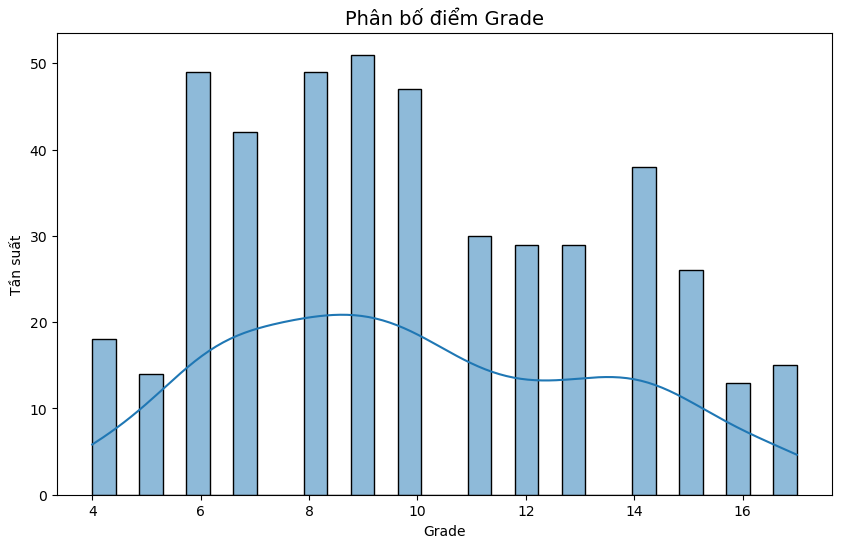

'  \nGiá trị tại các phần trăm phân vị:\n25% (Q1): 7.0\n50% (median): 10.0\n75% (Q3): 13.0\nGiá trị lớn nhất (max): 17.0 - giá trị lớn nhất trong cột Grade \n '

In [128]:
# Kiểm tra giá trị trong cột Grade
print(combined_df['Grade'].describe())

# Vẽ biểu đồ phân bố
plt.figure(figsize=(10, 6))
sns.histplot(combined_df['Grade'], bins=30, kde=True)
plt.title('Phân bố điểm Grade', fontsize=14)
plt.xlabel('Grade')
plt.ylabel('Tần suất')
plt.show()
'''  
Giá trị tại các phần trăm phân vị:
25% (Q1): 7.0
50% (median): 10.0
75% (Q3): 13.0
Giá trị lớn nhất (max): 17.0 - giá trị lớn nhất trong cột Grade 
 '''


PHẦN 3: THỐNG KÊ SUY DIỄN VÀ HỒI QUY TUYẾN TÍNH (5 ĐIỂM – CLO3)

In [133]:
#1
import numpy as np
import pandas as pd
from scipy import stats

# Giả sử df là DataFrame của bạn đã được định nghĩa
var1 = combined_df['New Grade']  # Biến định lượng 1
var2 = combined_df['Grade']  # Biến định lượng 2

# Tính trung bình và độ lệch chuẩn
mean1 = var1.mean()
mean2 = var2.mean()
std1 = var1.std(ddof=1)
std2 = var2.std(ddof=1)
n1 = len(var1)
n2 = len(var2)

# Tính giá trị Z
z = (mean1 - mean2) / np.sqrt((std1**2/n1) + (std2**2/n2))

# Tính giá trị p
p_value = 2 * (1 - stats.norm.cdf(abs(z)))

# In giá trị Z và p-value
print(f'Giá trị Z: {z:.2f}')
print(f'Giá trị p-value: {p_value:.4f}')

# Nhận xét
alpha = 0.10  # Mức sai lầm 10%
if p_value < alpha:
    print("Có đủ bằng chứng để bác bỏ giả thuyết null: Trung bình của hai biến khác nhau.")
else:
    print("Không có đủ bằng chứng để bác bỏ giả thuyết null: Trung bình của hai biến bằng nhau.")

Giá trị Z: 1.78
Giá trị p-value: 0.0746
Có đủ bằng chứng để bác bỏ giả thuyết null: Trung bình của hai biến khác nhau.


    Giá trị Z:1.78
    Giá trị p: 0.0746
    hai biến New Grade và Grade có sự khác biệt rõ rệt trong trung bình của chúng, Trung binh cua hai bien khac nhau 

In [135]:
#2
# Giá trị lý thuyết mà bạn muốn so sánh
mu0 = 1000

# Bước 2: Tính toán trung bình, độ lệch chuẩn và kích thước mẫu
sample = combined_df['Grade']  # 
mean_sample = sample.mean()
std_sample = sample.std(ddof=1)
n = len(sample)

# Bước 3: Tính giá trị T
T = (mean_sample - mu0) / (std_sample / np.sqrt(n))

# Tính số bậc tự do
df = n - 1

# Tính giá trị tới hạn cho α = 0.05
alpha = 0.05
critical_value = stats.t.ppf(1 - alpha/2, df)  # Giá trị tới hạn cho kiểm định 2 phía

# In kết quả
print(f"Mean of Sample: {mean_sample:.2f}, Std Dev: {std_sample:.2f}, n: {n}")
print(f"Calculated T-value: {T:.2f}")
print(f"Critical T-value: {critical_value:.2f}")

# Kiểm định giả thuyết
if abs(T) > critical_value:
    print("Bác bỏ giả thuyết H0: Trung bình không bằng 100.")
else:
    print("Không bác bỏ giả thuyết H0: Trung bình bằng 100.")

Mean of Sample: 9.98, Std Dev: 3.43, n: 450
Calculated T-value: -6127.31
Critical T-value: 1.97
Bác bỏ giả thuyết H0: Trung bình không bằng 100.


In [136]:
# Chia thành các nhóm
contingency_table = pd.crosstab(combined_df['Grade'], combined_df['New Grade'])

# Thực hiện kiểm định Chi-Square
chi2_stat, p_value_chi2, dof, expected = stats.chi2_contingency(contingency_table)

# In kết quả
print(f'Chi-Square Statistic: {chi2_stat:.2f}')
print(f'p-value: {p_value_chi2:.4f}')

# Nhận xét
alpha_chi2 = 0.05  # Mức sai lầm 5%
if p_value_chi2 < alpha_chi2:
    print("Có đủ bằng chứng để bác bỏ giả thuyết null: Hai biến có tương quan với nhau.")
else:
    print("Không có đủ bằng chứng để bác bỏ giả thuyết null: Hai biến không có tương quan.")

Chi-Square Statistic: 188.47
p-value: 0.1452
Không có đủ bằng chứng để bác bỏ giả thuyết null: Hai biến không có tương quan.


In [137]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
from statsmodels.formula.api import ols
